#About this dataset
link https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

Context


Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.


##Imports

In [14]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 22.7 MB/s eta 0:00:00


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import optuna
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

import warnings

##Load the data

In [2]:
df = pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


##Explore the data

In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum().sum()

np.int64(13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

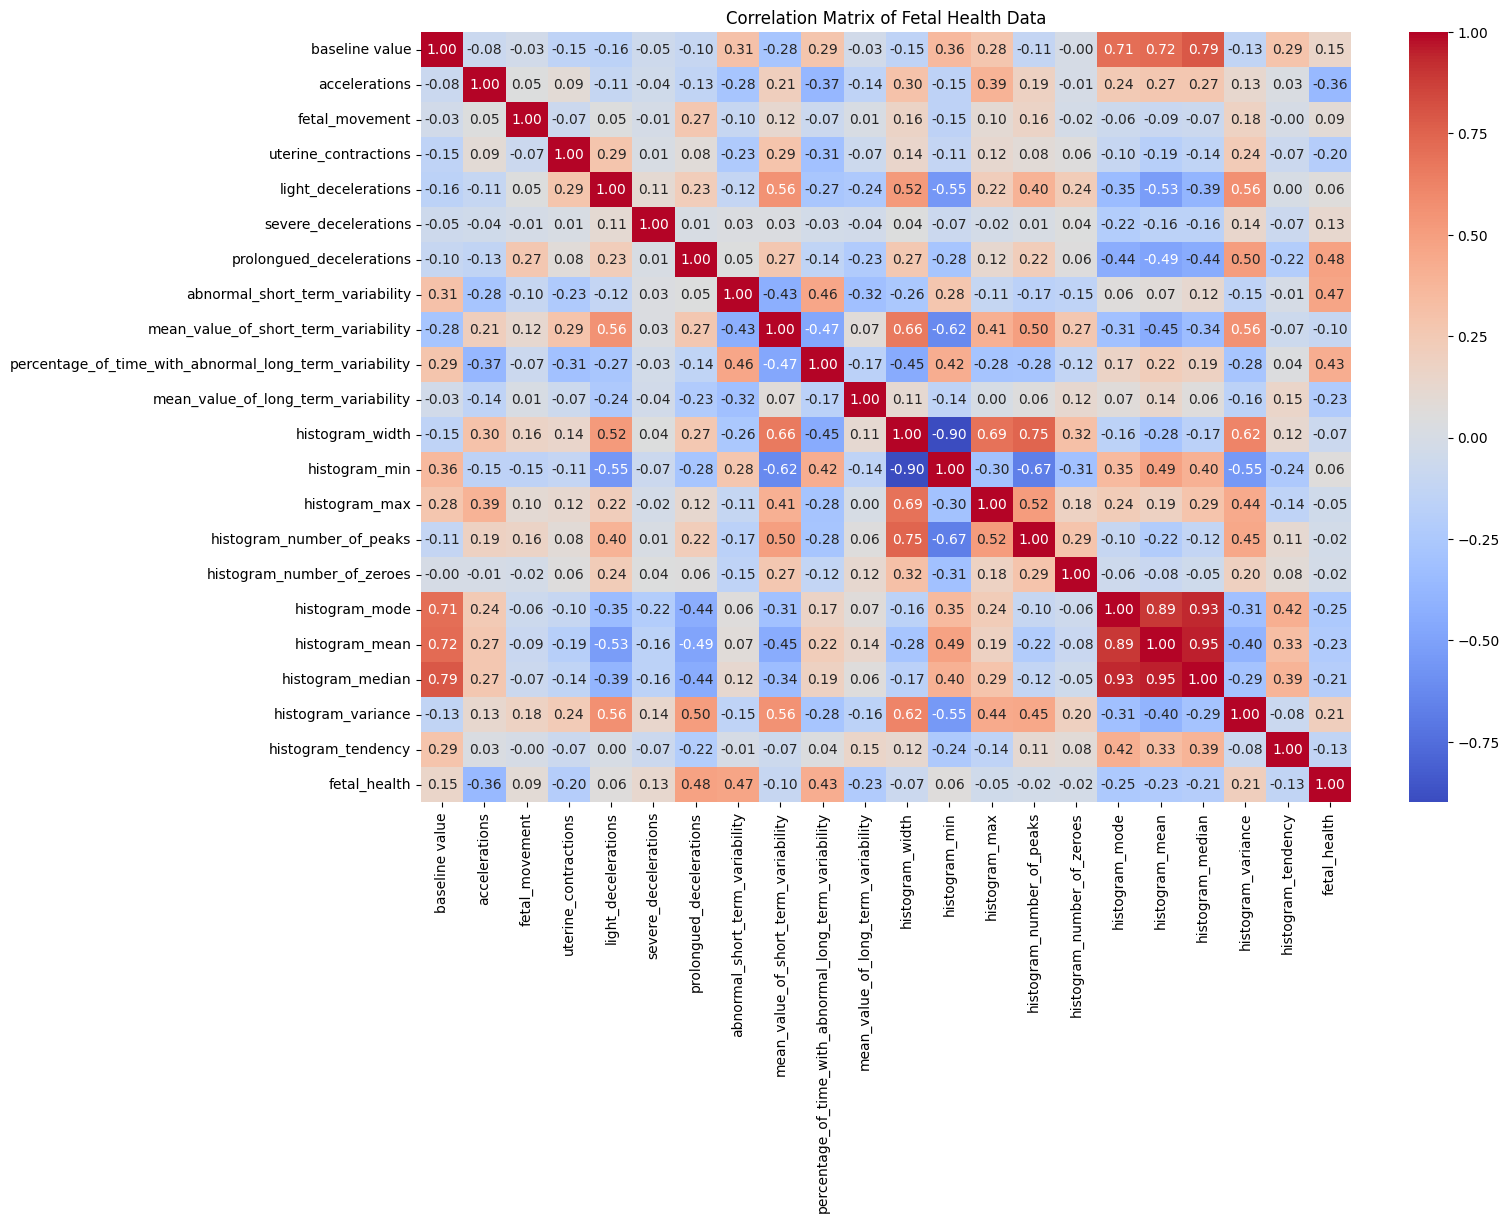

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Fetal Health Data')
plt.show()

In [8]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


##preprocessing

In [9]:
df = df.drop(columns=['histogram_mode', 'histogram_mean', 'histogram_median'])

In [10]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,11.0,1.0,1.0


In [11]:
df['fetal_health'].value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


##Training and building the model

In [16]:
x = df.drop(columns=['fetal_health'])
y = df['fetal_health']

In [25]:
x_train,x_test,y_train,y_test= train_test_split(
    x,y,
    test_size=0.20,
    random_state=42
)

In [20]:
scaler =  StandardScaler()


In [27]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
def get_results(trial):
    C = trial.suggest_loguniform('C', 0.00001, 10000.0)
    model = LogisticRegression(C=C)
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [30]:
study = optuna.create_study(direction='maximize')
study.optimize(get_results, n_trials=100, show_progress_bar=True)

[I 2025-09-23 19:02:06,595] A new study created in memory with name: no-name-68bcaad9-0dd3-4300-911e-31f74220e6d8


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:06,655] Trial 0 finished with value: 0.7816901408450704 and parameters: {'C': 1.4982112358061123e-05}. Best is trial 0 with value: 0.7816901408450704.
[I 2025-09-23 19:02:06,699] Trial 1 finished with value: 0.8826291079812206 and parameters: {'C': 20.260510722553956}. Best is trial 1 with value: 0.8826291079812206.
[I 2025-09-23 19:02:06,753] Trial 2 finished with value: 0.8826291079812206 and parameters: {'C': 39.07922406504024}. Best is trial 1 with value: 0.8826291079812206.
[I 2025-09-23 19:02:06,774] Trial 3 finished with value: 0.7816901408450704 and parameters: {'C': 1.5530982171611763e-05}. Best is trial 1 with value: 0.8826291079812206.
[I 2025-09-23 19:02:06,841] Trial 4 finished with value: 0.8826291079812206 and parameters: {'C': 143.30655934989508}. Best is trial 1 with value: 0.8826291079812206.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)


[I 2025-09-23 19:02:06,897] Trial 5 finished with value: 0.7816901408450704 and parameters: {'C': 5.8686599599345815e-05}. Best is trial 1 with value: 0.8826291079812206.
[I 2025-09-23 19:02:06,982] Trial 6 finished with value: 0.8826291079812206 and parameters: {'C': 28.074091951169002}. Best is trial 1 with value: 0.8826291079812206.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)


[I 2025-09-23 19:02:07,167] Trial 7 finished with value: 0.8873239436619719 and parameters: {'C': 1.4829657070616744}. Best is trial 7 with value: 0.8873239436619719.
[I 2025-09-23 19:02:07,265] Trial 8 finished with value: 0.8826291079812206 and parameters: {'C': 4290.255766878706}. Best is trial 7 with value: 0.8873239436619719.
[I 2025-09-23 19:02:07,359] Trial 9 finished with value: 0.8826291079812206 and parameters: {'C': 50.45654658829202}. Best is trial 7 with value: 0.8873239436619719.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:07,426] Trial 10 finished with value: 0.892018779342723 and parameters: {'C': 0.011973352260312058}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:07,467] Trial 11 finished with value: 0.892018779342723 and parameters: {'C': 0.01155328938103651}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:07,524] Trial 12 finished with value: 0.892018779342723 and parameters: {'C': 0.010709662911916261}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:07,568] Trial 13 finished with value: 0.8896713615023474 and parameters: {'C': 0.007927676196327952}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:07,616] Trial 14 finished with value: 0.8873239436619719 and parameters: {'C': 0.006558890055866368}. Best is trial 10 with value: 0.892018779342723.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:07,700] Trial 15 finished with value: 0.8826291079812206 and parameters: {'C': 0.13580200097250197}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:07,739] Trial 16 finished with value: 0.7887323943661971 and parameters: {'C': 0.0007788571459778776}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:07,805] Trial 17 finished with value: 0.8873239436619719 and parameters: {'C': 0.3358575904483207}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:07,835] Trial 18 finished with value: 0.7816901408450704 and parameters: {'C': 0.00030208402535243704}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:07,878] Trial 19 finished with value: 0.8849765258215962 and parameters: {'C': 0.08893219530653426}. Best is trial 10 with value: 0.892018779342723.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)


[I 2025-09-23 19:02:07,932] Trial 20 finished with value: 0.812206572769953 and parameters: {'C': 0.0012425973065600321}. Best is trial 10 with value: 0.892018779342723.
[I 2025-09-23 19:02:08,021] Trial 21 finished with value: 0.8943661971830986 and parameters: {'C': 0.0131455384857134}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,113] Trial 22 finished with value: 0.8849765258215962 and parameters: {'C': 0.038128241178118284}. Best is trial 21 with value: 0.8943661971830986.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:08,162] Trial 23 finished with value: 0.8849765258215962 and parameters: {'C': 2.246355654484158}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,200] Trial 24 finished with value: 0.8145539906103286 and parameters: {'C': 0.001403654419852415}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,224] Trial 25 finished with value: 0.8873239436619719 and parameters: {'C': 0.02697666273634527}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,254] Trial 26 finished with value: 0.7816901408450704 and parameters: {'C': 0.0002057847178713372}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,295] Trial 27 finished with value: 0.8873239436619719 and parameters: {'C': 0.46928730109426986}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,339] Trial 28 finished with value: 0.8474178403755869 and parameters: {'C': 0.0024752652578754783}. Best is trial 21 with valu

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:08,385] Trial 29 finished with value: 0.8873239436619719 and parameters: {'C': 1.4252336114714377}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,420] Trial 30 finished with value: 0.8826291079812206 and parameters: {'C': 0.029475200568805413}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,457] Trial 31 finished with value: 0.8873239436619719 and parameters: {'C': 0.007471200331764601}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,479] Trial 32 finished with value: 0.8873239436619719 and parameters: {'C': 0.007481978940428448}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,517] Trial 33 finished with value: 0.8873239436619719 and parameters: {'C': 0.0803286625498933}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,550] Trial 34 finished with value: 0.7816901408450704 and parameters: {'C': 0.00028788773852327055}. Best is trial 21 with val

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:08,602] Trial 36 finished with value: 0.7816901408450704 and parameters: {'C': 4.578186272101331e-05}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,652] Trial 37 finished with value: 0.8826291079812206 and parameters: {'C': 5.83304822698555}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,688] Trial 38 finished with value: 0.863849765258216 and parameters: {'C': 0.003457289264300462}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,717] Trial 39 finished with value: 0.8826291079812206 and parameters: {'C': 0.13829017310885597}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,772] Trial 40 finished with value: 0.8826291079812206 and parameters: {'C': 956.9172640019063}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,800] Trial 41 finished with value: 0.892018779342723 and parameters: {'C': 0.010711714843016959}. Best is trial 21 with value: 0.8

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:08,827] Trial 42 finished with value: 0.784037558685446 and parameters: {'C': 0.0007140022748054911}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,854] Trial 43 finished with value: 0.8896713615023474 and parameters: {'C': 0.019197909848164108}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,879] Trial 44 finished with value: 0.8779342723004695 and parameters: {'C': 0.0045741243824505675}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,919] Trial 45 finished with value: 0.8849765258215962 and parameters: {'C': 0.0677167132034596}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,959] Trial 46 finished with value: 0.8873239436619719 and parameters: {'C': 0.5816457683877445}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:08,985] Trial 47 finished with value: 0.7816901408450704 and parameters: {'C': 6.132626755433507e-05}. Best is trial 21 with val

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:09,039] Trial 48 finished with value: 0.8873239436619719 and parameters: {'C': 0.1899652304475338}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,059] Trial 49 finished with value: 0.892018779342723 and parameters: {'C': 0.01163755044685609}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,091] Trial 50 finished with value: 0.7816901408450704 and parameters: {'C': 0.0006101999770482925}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,140] Trial 51 finished with value: 0.892018779342723 and parameters: {'C': 0.013970600268487373}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,164] Trial 52 finished with value: 0.8403755868544601 and parameters: {'C': 0.0021816744030561247}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,211] Trial 53 finished with value: 0.8849765258215962 and parameters: {'C': 0.05308588154623104}. Best is trial 21 with value

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:09,247] Trial 54 finished with value: 0.892018779342723 and parameters: {'C': 0.01210311906363492}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,278] Trial 55 finished with value: 0.8708920187793427 and parameters: {'C': 0.003983359314564342}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,308] Trial 56 finished with value: 0.8826291079812206 and parameters: {'C': 0.03041757849758141}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,355] Trial 57 finished with value: 0.8873239436619719 and parameters: {'C': 0.24771583913575249}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,394] Trial 58 finished with value: 0.8309859154929577 and parameters: {'C': 0.0019056540542049802}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,411] Trial 59 finished with value: 0.7816901408450704 and parameters: {'C': 0.00013333551016384796}. Best is trial 21 with va

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:09,464] Trial 60 finished with value: 0.8873239436619719 and parameters: {'C': 0.8455675026609375}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,506] Trial 61 finished with value: 0.892018779342723 and parameters: {'C': 0.009064565666914121}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,531] Trial 62 finished with value: 0.892018779342723 and parameters: {'C': 0.021846234209373736}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,551] Trial 63 finished with value: 0.8075117370892019 and parameters: {'C': 0.00111857575539957}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,593] Trial 64 finished with value: 0.892018779342723 and parameters: {'C': 0.011547583126799266}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,628] Trial 65 finished with value: 0.8849765258215962 and parameters: {'C': 0.05285133052926333}. Best is trial 21 with value: 0

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:09,693] Trial 67 finished with value: 0.8826291079812206 and parameters: {'C': 0.09838731556500313}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,730] Trial 68 finished with value: 0.7816901408450704 and parameters: {'C': 0.0005368681291923986}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,754] Trial 69 finished with value: 0.892018779342723 and parameters: {'C': 0.013890168618504471}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,777] Trial 70 finished with value: 0.852112676056338 and parameters: {'C': 0.002810950622428737}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,812] Trial 71 finished with value: 0.8826291079812206 and parameters: {'C': 0.03428158830685988}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,861] Trial 72 finished with value: 0.892018779342723 and parameters: {'C': 0.010942531295715286}. Best is trial 21 with value

/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:09,939] Trial 74 finished with value: 0.8896713615023474 and parameters: {'C': 0.016615807430785907}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:09,979] Trial 75 finished with value: 0.812206572769953 and parameters: {'C': 0.0012500793452055385}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,041] Trial 76 finished with value: 0.8873239436619719 and parameters: {'C': 0.04442530209369578}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,085] Trial 77 finished with value: 0.8849765258215962 and parameters: {'C': 0.1300680452748961}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,122] Trial 78 finished with value: 0.8755868544600939 and parameters: {'C': 0.004334732839152917}. Best is trial 21 with value: 0.8943661971830986.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:10,169] Trial 79 finished with value: 0.8849765258215962 and parameters: {'C': 0.005979531957193736}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,218] Trial 80 finished with value: 0.8896713615023474 and parameters: {'C': 0.023688852559483938}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,267] Trial 81 finished with value: 0.892018779342723 and parameters: {'C': 0.009157109926017929}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,317] Trial 82 finished with value: 0.892018779342723 and parameters: {'C': 0.011738096003847712}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,346] Trial 83 finished with value: 0.863849765258216 and parameters: {'C': 0.003153931664877079}. Best is trial 21 with value: 0.8943661971830986.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:10,379] Trial 84 finished with value: 0.8380281690140845 and parameters: {'C': 0.002029650543443943}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,446] Trial 85 finished with value: 0.8849765258215962 and parameters: {'C': 0.06743771317183411}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,502] Trial 86 finished with value: 0.8896713615023474 and parameters: {'C': 0.020622785353690117}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,561] Trial 87 finished with value: 0.7816901408450704 and parameters: {'C': 1.0535553024485606e-05}. Best is trial 21 with value: 0.8943661971830986.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:10,616] Trial 88 finished with value: 0.8873239436619719 and parameters: {'C': 0.00656137347422223}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,670] Trial 89 finished with value: 0.8873239436619719 and parameters: {'C': 0.04474282221129002}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,719] Trial 90 finished with value: 0.7816901408450704 and parameters: {'C': 0.0004045851590328361}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,769] Trial 91 finished with value: 0.8896713615023474 and parameters: {'C': 0.022492186984563806}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,807] Trial 92 finished with value: 0.8896713615023474 and parameters: {'C': 0.015231849490534641}. Best is trial 21 with value: 0.8943661971830986.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2025-09-23 19:02:10,854] Trial 93 finished with value: 0.8896713615023474 and parameters: {'C': 0.00873159924895189}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:10,940] Trial 94 finished with value: 0.8826291079812206 and parameters: {'C': 0.031063811635063016}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:11,004] Trial 95 finished with value: 0.8826291079812206 and parameters: {'C': 0.10169051687517357}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:11,061] Trial 96 finished with value: 0.8192488262910798 and parameters: {'C': 0.0015257690069503357}. Best is trial 21 with value: 0.8943661971830986.


/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)
/tmp/ipython-input-2790406037.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.00001, 10000.0)


[I 2025-09-23 19:02:11,158] Trial 97 finished with value: 0.8873239436619719 and parameters: {'C': 0.21231461168016783}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:11,207] Trial 98 finished with value: 0.863849765258216 and parameters: {'C': 0.0031767290095953173}. Best is trial 21 with value: 0.8943661971830986.
[I 2025-09-23 19:02:11,299] Trial 99 finished with value: 0.8873239436619719 and parameters: {'C': 0.4023254027730296}. Best is trial 21 with value: 0.8943661971830986.


In [31]:
best_params = study.best_params
best_params

{'C': 0.0131455384857134}

In [33]:
model = LogisticRegression(C=best_params['C'])
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8943661971830986